## The settting
Find if a 2D point is contained within a 2D convex polygon  
The input is a point given by (x0, y0)  
the convex polygon is given by an ordered list of [[x1, y1], [x1, y2] ... [x_n, y_n]]  

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

## Solution

In [53]:
def is_inside_polygon(pvertices, point):
    side = None
    x0, y0 = point
    for i in range(len(pvertices)):
        x1,y1 = pvertices[i] # unpack
        x2,y2 = pvertices[(i+1) % len(pvertices)] # use modulo to account for the last index
        x_edge, y_edge = (x2 - x1, y2 - y1) # as the first point is our "origin" we move the other two by substracting it
        x0_moved, y0_moved = (x0 - x1, y0 - y1)
        current_side = x_edge*y0_moved - y_edge*x0_moved < 0 # check side using cross product
        if side is not None and side != current_side:
            return False
        side = current_side
    return True

## Simple test

In [78]:
size = 17
limit = 30
# Use scipy to generate random convex polygon from a set of random points
random_points = np.random.randint(0,limit, (size,2))
polygon = ConvexHull(random_points)
# print(random_points[polygon.vertices])

In [72]:
not_polygon_indices = [p for p in range(size) if p not in polygon.vertices]

polygon_vertices = random_points[polygon.vertices]
positive_test_point = random_points[np.random.choice(not_polygon_indices)]
random_test_point = np.random.randint(0,30,(1,2))[0]

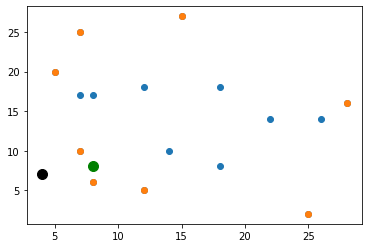

In [73]:
# Plot the vertices (yellow), 
# the positive test (green) 
# and the random test (black)
plt.scatter(random_points[:,0], random_points[:,1])
plt.scatter(random_points[polygon.vertices][:,0], random_points[polygon.vertices][:,1])
plt.plot(positive_test_point[0], positive_test_point[1], marker="o", markersize=10, markeredgecolor="green", markerfacecolor="green")
plt.plot(random_test_point[0], random_test_point[1], marker="o", markersize=10, markeredgecolor="black", markerfacecolor="black")

In [77]:
print(f"Is the positive point inside? {is_inside_polygon(polygon_vertices, positive_test_point)}")
print(f"Is the random point inside? {is_inside_polygon(polygon_vertices, random_test_point)}")

Is the positive point inside? True
Is the random point inside? False
